In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data_dir="/content/drive/MyDrive/ML_DF.csv"
naive_bayes_df= pd.read_csv(data_dir)

In [ ]:
naive_bayes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913217 entries, 0 to 913216
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   pu_location                      913217 non-null  int64  
 1   do_location                      913217 non-null  int64  
 2   passenger_count                  913217 non-null  int64  
 3   trip_distance                    913217 non-null  float64
 4   fare_amount                      913217 non-null  float64
 5   extra                            913217 non-null  float64
 6   mta_tax                          913217 non-null  float64
 7   tip_amount                       913217 non-null  float64
 8   tolls_amount                     913217 non-null  float64
 9   improvement_surcharge            913217 non-null  float64
 10  payment_type                     913217 non-null  int64  
 11  week_number                      913217 non-null  int64  
 12  ra

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Assuming naiive_df contains your features and target variable
X = naive_bayes_df.drop(columns=['trip_price'])  # Adjust 'target_column' to the name of your target column
y = naive_bayes_df['trip_price']

# Shuffle the dataset
X_shuffle, y_shuffle = shuffle(X, y, random_state=42)

# Define the sizes for train and test sets
train_size = 0.8
test_size = 0.2

# Split the shuffled dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_shuffle, y_shuffle, test_size=test_size, random_state=42)

In [ ]:
# Since the Naive Bayesian Classifier does not handle mixed features 'discrete and continuous together'
# divide the X_train and X_test datasets into 2 subsets, one for the continuous variables and one for the discrete variables for each dataset.

# Divide X_train into subsets for continuous and discrete variables
discrete_X_train = X_train.select_dtypes(include=['int64', 'object']).copy()
continuous_X_train = X_train.select_dtypes(include=['float64']).copy()

# Divide X_test into subsets for continuous and discrete variables
discrete_X_test = X_test.select_dtypes(include=['int64', 'object']).copy()
continuous_X_test = X_test.select_dtypes(include=['float64']).copy()


In [ ]:
# Perform Naive bayesian classifer on discrete_X_train

from sklearn.naive_bayes import CategoricalNB

# Initialize and train the Naive Bayes classifier
nb_classifier = CategoricalNB()
nb_classifier.fit(discrete_X_train, y_train)

# Predict on the test set
y_pred_xtrain_disc = nb_classifier.predict(discrete_X_test)

In [ ]:
# Perform Naive bayesian classifer for continuous_X_train

from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(continuous_X_train, y_train)

# Predict on the test set
y_pred_xtain_cont = nb_classifier.predict(continuous_X_test)

In [ ]:
#  Perform Naive bayesian classifer on discrete_X_test

from sklearn.naive_bayes import CategoricalNB

# Initialize and train the Naive Bayes classifier for discrete variables
nb_discrete_classifier = CategoricalNB()
nb_discrete_classifier.fit(discrete_X_train, y_train)

# Predict on the discrete_X_test dataset
y_pred_discrete = nb_discrete_classifier.predict_proba(discrete_X_test)

In [ ]:
# Perform Naive bayesian classifer for continuous_X_test

from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes classifier for discrete variables
nb_continuos_classifier = GaussianNB()
nb_continuos_classifier.fit(continuous_X_train, y_train)

# Predict on the continuous_X_test dataset
y_pred_continuous = nb_continuos_classifier.predict_proba(continuous_X_test)

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Combine the probabilities by multiplying them (assuming independence)
combined_prob = y_pred_continuous * y_pred_discrete

# Normalize the combined probabilities
combined_prob = combined_prob / combined_prob.sum(axis=1, keepdims=True)
print(combined_prob)

# Predict the class with the highest combined probability
y_pred_combined = np.argmax(combined_prob, axis=1)

class_mapping = {0: 'high', 1: 'low', 2: 'medium'}

# Map the predicted class indices to their corresponding labels
y_pred_encoded = [class_mapping[pred_class] for pred_class in y_pred_combined]

# Print the encoded predictions
print("Encoded Predictions:", y_pred_encoded)

# Calculate the total accuracy
total_accuracy = accuracy_score(y_test, y_pred_encoded)
print("Total Accuracy for combined features:", total_accuracy)

[[1.14373003e-06 7.17193990e-11 9.99998856e-01]
 [1.11917830e-06 5.46788630e-11 9.99998881e-01]
 [9.99965921e-01 3.40787555e-05 2.08416632e-12]
 ...
 [7.89710090e-07 1.66824365e-10 9.99999210e-01]
 [3.51635947e-05 3.42214086e-10 9.99964836e-01]
 [2.27265765e-06 6.42089722e-11 9.99997727e-01]]
Encoded Predictions: ['medium', 'medium', 'high', 'medium', 'high', 'medium', 'medium', 'medium', 'high', 'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'high', 'high', 'medium', 'high', 'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'high', 'medium', 'high', 'medium', 'medium', 'medium', 'high', 'high', 'medium', 'medium', 'medium', 'medium', 'medium', 'high', 'medium', 'low', 'medium', 'medium', 'medium', 'medium', 'medium', 'high', 'medium', 'medium', 'medium', 'medium', 'medium', 'high', 'medium', 'medium', 'medium', 'medium', 'high', 'medium', 'high', 'medium', 'medium', 'medium', 'low', 'medium', 'medium', 'medium', 'medium', 'medium', 

In [ ]:
# From the above results, we can notice tha the total accuracy for this classifier was 93.29351087361205 %

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Compute confusion matrix
conf_matrix= confusion_matrix(y_test, y_pred_encoded)

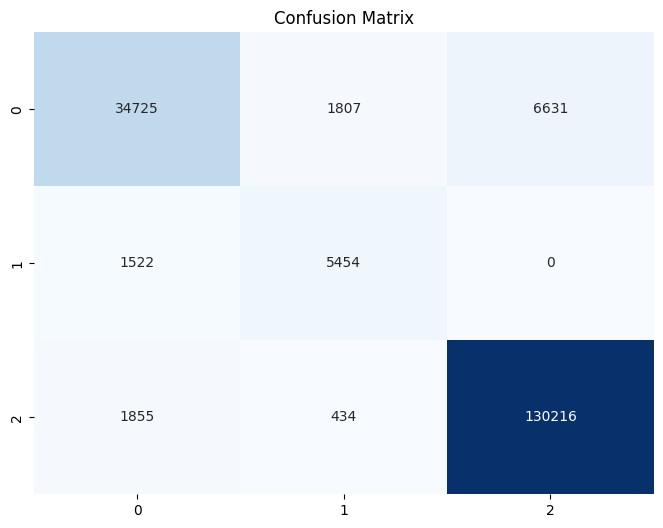

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# For the confusion matrix, True Positives (Correct Predictions):
#Class 0: 34725 instances of Class 0 were correctly predicted as Class 0.
#Class 1: 5454 instances of Class 1 were correctly predicted as Class 1.
#Class 2: 130216 instances of Class 2 were correctly predicted as Class 2.

In [ ]:
from sklearn.metrics import classification_report
# Generate classification report
report_class = classification_report(y_test, y_pred_encoded)
print("classification report:")
print(report_class)


classification report:
              precision    recall  f1-score   support

        high       0.91      0.80      0.85     43163
         low       0.71      0.78      0.74      6976
      medium       0.95      0.98      0.97    132505

    accuracy                           0.93    182644
   macro avg       0.86      0.86      0.86    182644
weighted avg       0.93      0.93      0.93    182644



In [ ]:
# As for the classification report:
# It indicates The classification model performs well overall, with particularly strong performance in the "medium" class.
# The "high" class also performs well, while the "low" class shows comparatively lower precision and recall, indicating room for improvement in identifying "low"
#   instances correctly.